Task 3: Customer Segmentation / Clustering

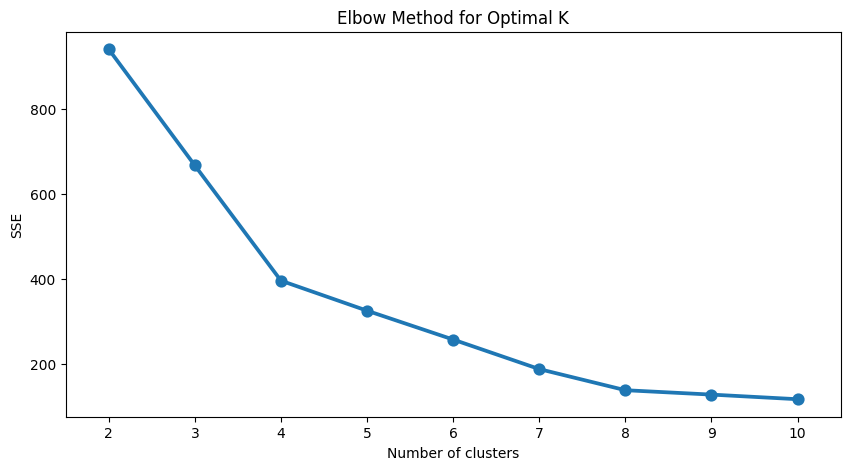

Davies-Bouldin Index: 0.7434534867259787


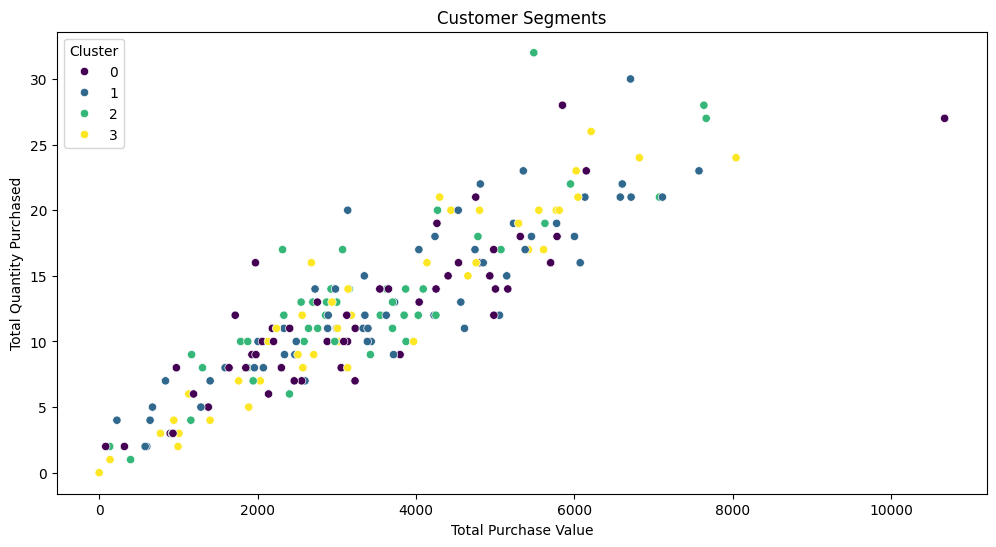

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the elbow method
sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_profiles_scaled)
    sse[k] = kmeans.inertia_

# Plot the elbow curve
plt.figure(figsize=(10, 5))
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Choose the optimal number of clusters (e.g., 4 based on the elbow plot)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(customer_profiles_scaled)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(customer_profiles_scaled, customer_profiles['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_profiles, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Purchase Value')
plt.ylabel('Total Quantity Purchased')
plt.show()
